# Customer Segmentation with Clustering Algorithms

  # Problem statement :
Customer segmentation helps businesses to categorize customers and marketing in the preferable category of customers. This way businesses need less money, time and effort. Thus,categorization of customers is our task in this project.
It is important to define the customer profile. It allows customers to prepare campaigns and deliver them to the right customer. I tried to determine the correct customer profile by using clustering algorithms.

# What Is Customer Segmentation?
Customer segmentation is a marketing strategy in which select groups of consumers are identified so that certain products or product lines can be presented to them in a way that appeals to their interests.

# Types of Customer segmentation
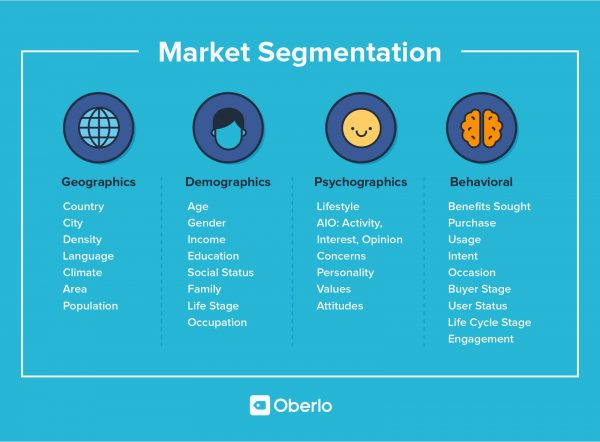 
## Here, We will use Demographics customer segmentation

# Why Is Customer Segmentation Important?
Customer segmentation realizes that not all customers have the same interests, purchasing power, or consumer needs. Instead of catering to all prospective clients broadly, Customer segmentation is important because it strives to make a company's marketing endeavors more strategic and refined. By developing specific plans for specific products with target audiences in mind, a company can increase its chances of generating sales and being more efficient with resources.
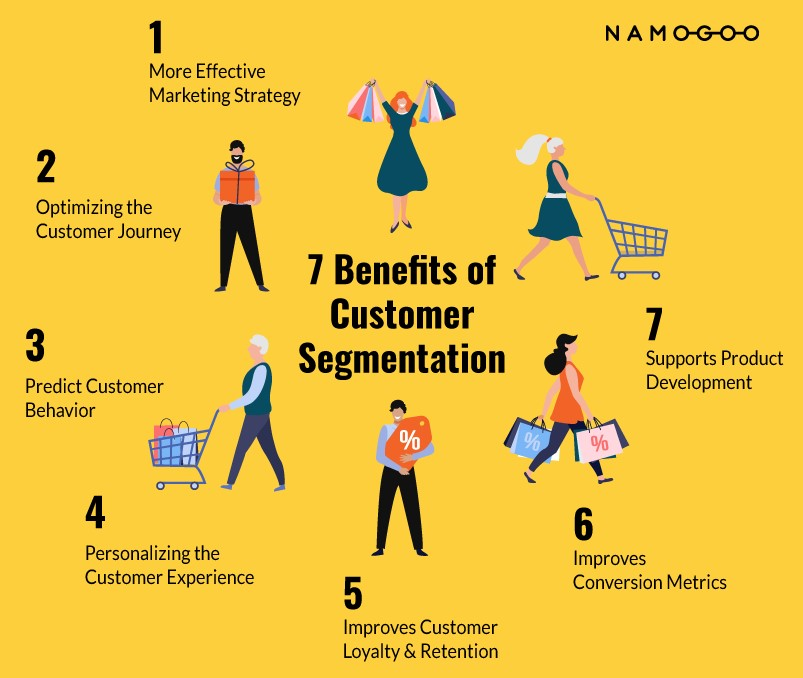

<img src="https://www.marketing91.com/wp-content/uploads/2015/02/Increasing-hispanic-market-share-1024x588.jpg" width="500px" height="300px"/>


## CONTENTS
### 1. Libraries import and read data
### 2. Visualizations
### 3. Implementation of clustering algorithms
##### A. K-Means clustering algorithm
##### B. Hirarchical clustering algorithm

<a id="1"></a>
# 1. Libraries import and read data

In [1]:
import numpy as np  
import pandas as pd 

 
import matplotlib.pyplot as plt
import seaborn as sns 

 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings(action='ignore')
import os
print(os.listdir("../input"))

['clustering-data']


In [2]:
data = pd.read_csv('../input/clustering-data/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
def feature_count(data):
 
    total_missing = data.isnull().sum().sort_values(ascending = False)
    percent_missing = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending = False)
    missing = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
    
    
    total_data = data.count()
    tt = pd.DataFrame(total_data)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    unique = tt 
    return pd.concat([missing, unique], axis=1, keys=['Missing', 'UNIQUE'])

In [5]:
feature_count(data)

Missing         UNIQUE        
                         Total Percent  Total Uniques
CustomerID                   0     0.0    200     200
Gender                       0     0.0    200       2
Age                          0     0.0    200      51
Annual Income (k$)           0     0.0    200      64
Spending Score (1-100)       0     0.0    200      84

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
print(pd.isnull(data).sum().sum())

0


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


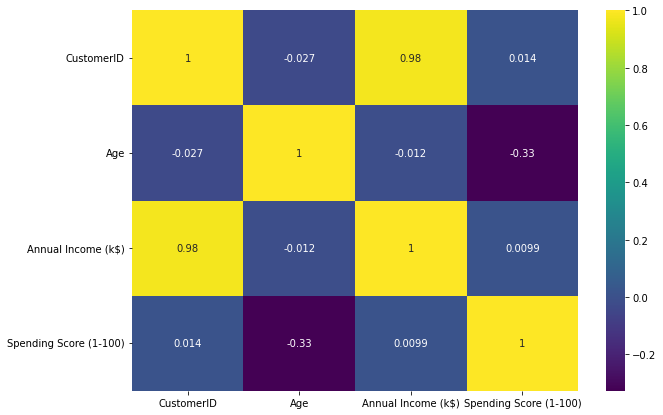

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
plt.show()

# 2. Visualizations

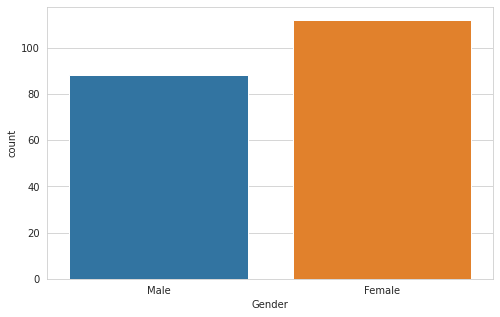

In [11]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(data.Gender)
plt.show()

#### It shows that in a mall more females came as compared to male.

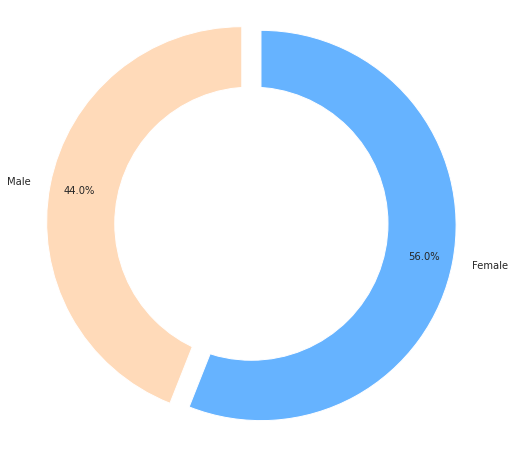

In [12]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

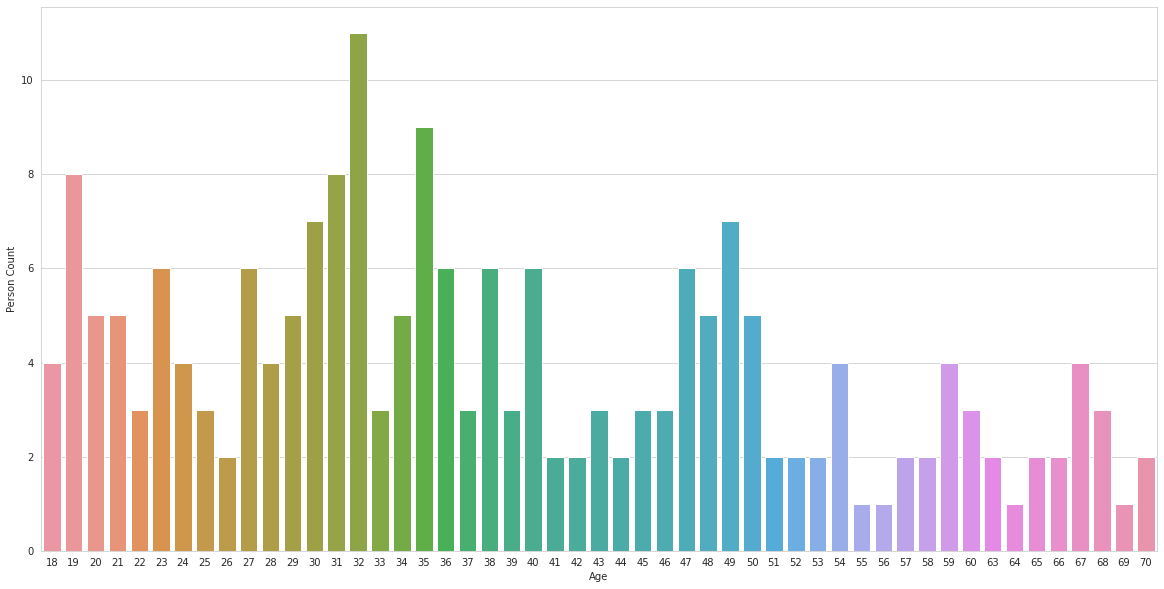

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

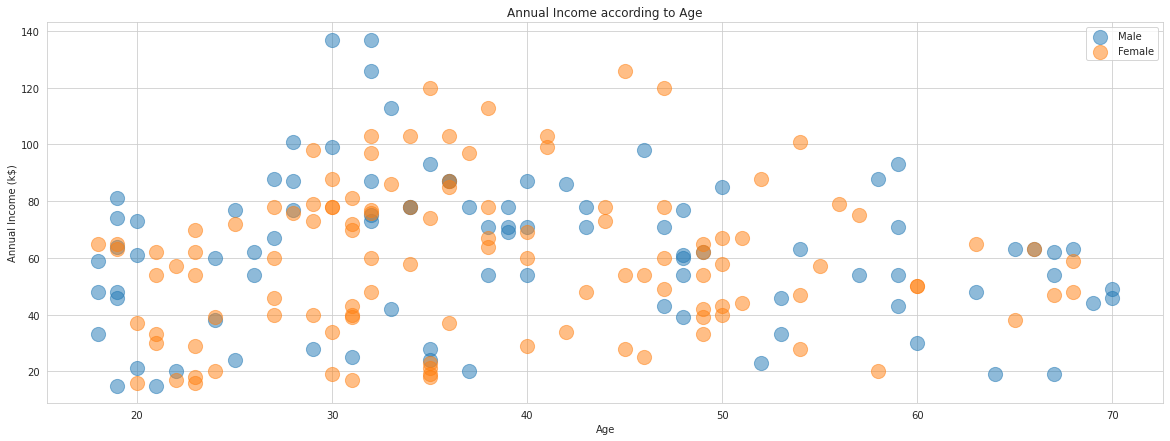

In [14]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Annual Income (k$)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Annual Income according to Age")
plt.show()

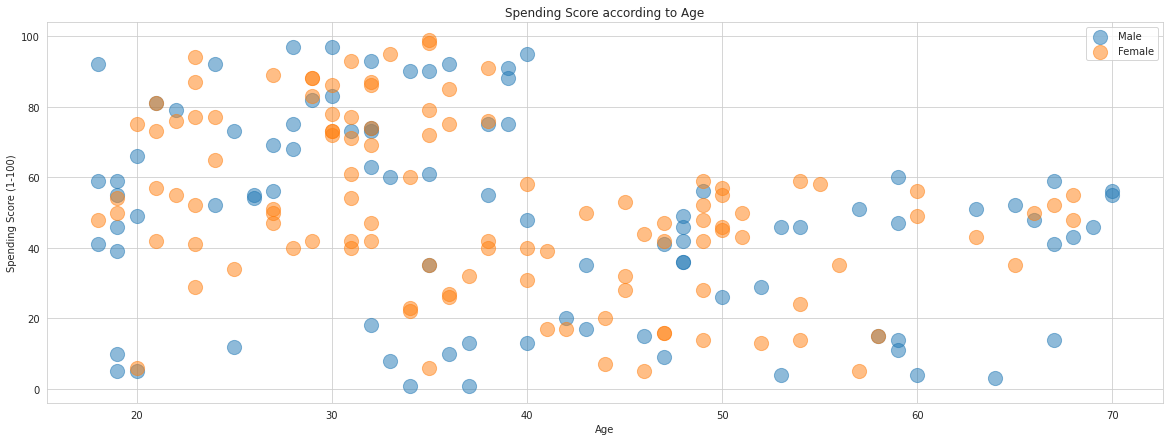

In [15]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Spending Score (1-100)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score according to Age")
plt.show()

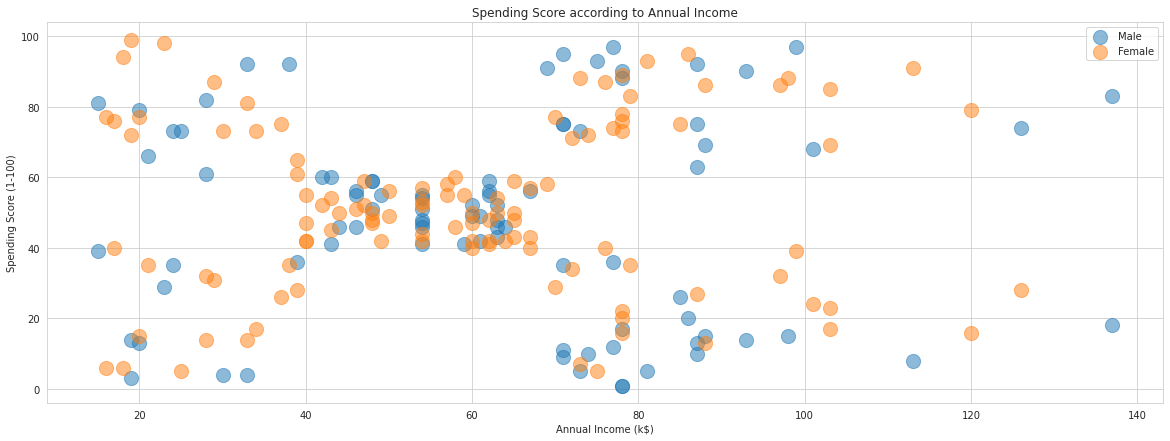

In [16]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score according to Annual Income")
plt.show()

<a id="2"></a>
# 3. Implementation of Clustering Algorithms

#### K-Means Clustering Algorithm

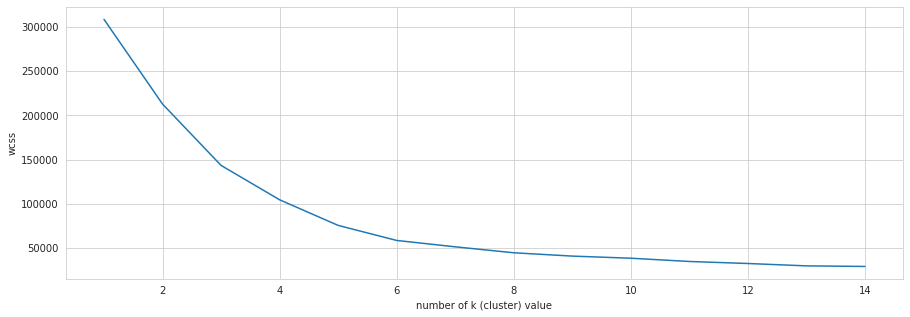

In [17]:
#define k value
wcss = []
data_model = data.drop(['Gender','CustomerID'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

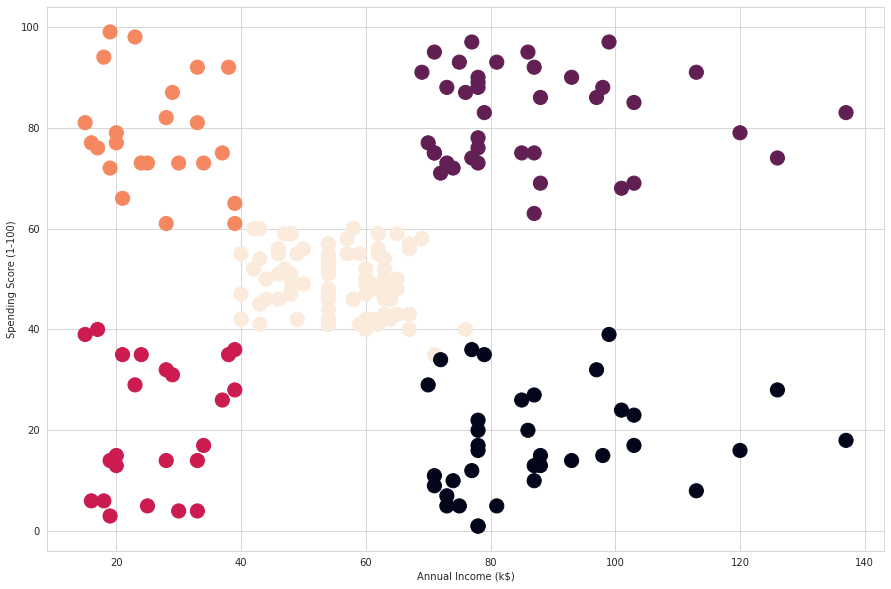

In [18]:
#create model
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data_model , c = data_predict , s = 200 )
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### Hierarchical Clustering Algorithm

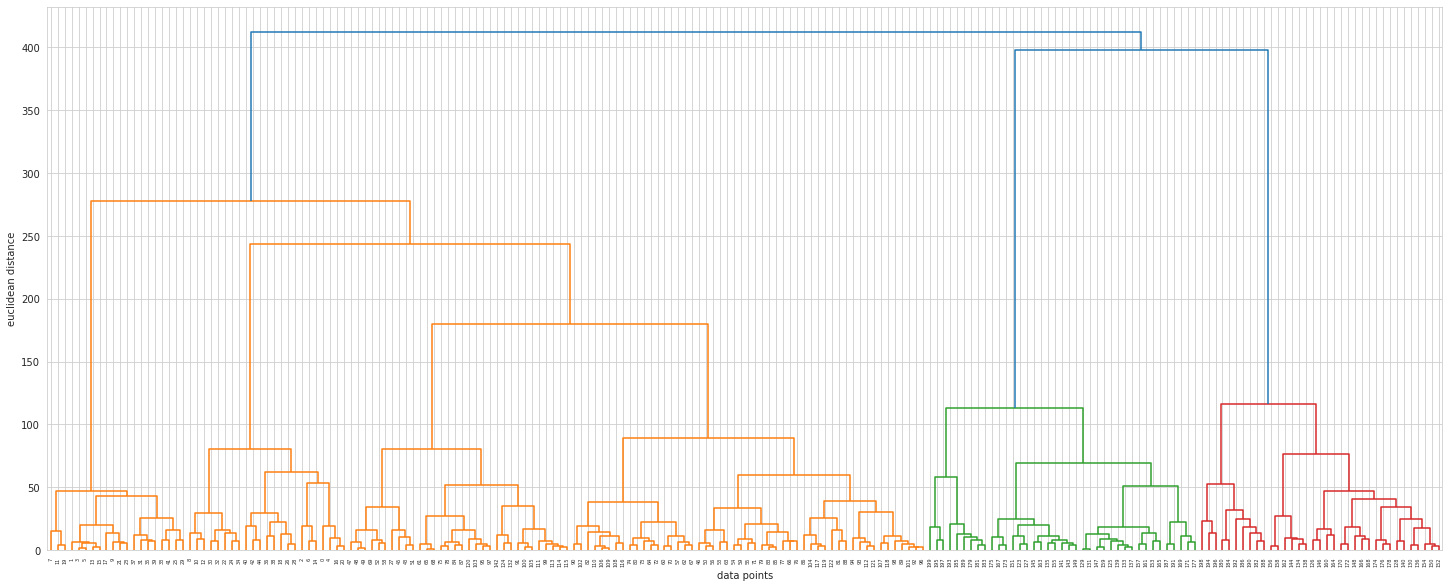

In [19]:
#create dendrogram and find the best clustering value
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

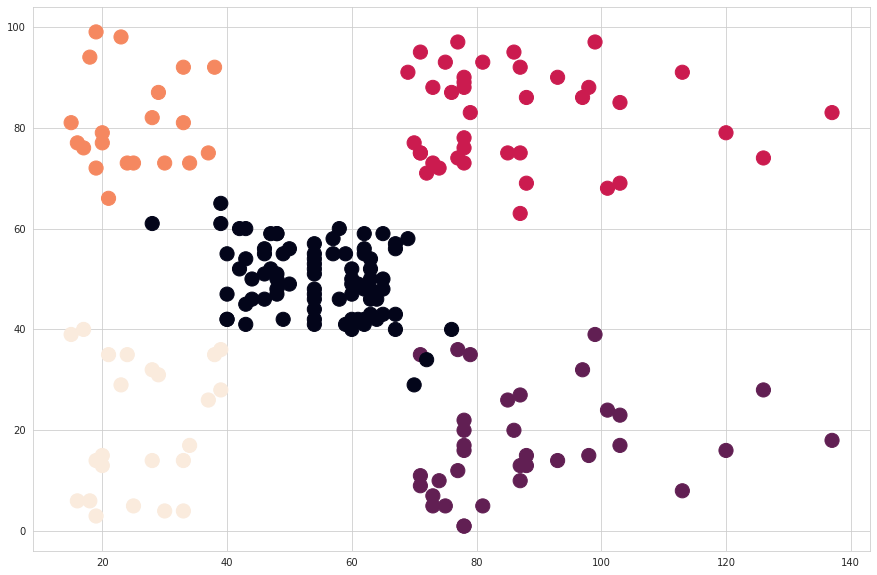

In [20]:
#create model
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data_model)
plt.figure(figsize=(15,10))
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data_model , c = data_predict , s = 200 )
plt.show()

## Thanking you